In [1]:
import pandas as pd
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import random
import warnings
warnings.filterwarnings("ignore")


In [2]:
sample_news_data = '../data/sample_news_data.txt'

In [3]:
with open(sample_news_data, encoding="utf8", errors='ignore') as f:
    news_lines = [line for line in f.readlines()]

In [4]:
lines_df = pd.DataFrame()

In [5]:
indices  = list(range(len(news_lines)))

In [6]:
lines_df['news'] = news_lines
lines_df['index'] = indices

In [7]:
lines_df.head()

,news,index
0,Top of the Pops leaves BBC One The BBC flagshi...,0
1,Oscars race enters final furlong The race for ...,1
2,US TV special for tsunami relief A US televisi...,2
3,Williamson lauds bowlers for adapting to atypi...,3
4,Housewives lift Channel ratings The debut of U...,4


In [8]:
def preprocess( document):
       return preprocess_string(remove_stopwords(document))

In [9]:
document = lines_df['news'].apply(preprocess)

In [10]:
documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]

In [11]:
class DocumentDataset(object):
    
    def __init__(self, data:pd.DataFrame, column):
        document = data[column].apply(self.preprocess)
        
        self.documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]
      
    def preprocess(self, document):
        return preprocess_string(remove_stopwords(document))
        
    def __iter__(self):
        for document in self.documents:
            yield documents
            
    def tagged_documents(self, shuffle=False):
        if shuffle:
            random.shuffle(self.documents)
        return self.documents


In [12]:
documents_dataset = DocumentDataset(lines_df, 'news')

In [13]:
docVecModel = Doc2Vec(min_count=1, window=5, vector_size=100, sample=1e-4, negative=5, workers=8)
docVecModel.build_vocab(documents_dataset.tagged_documents())

In [14]:
docVecModel.train(documents_dataset.tagged_documents(shuffle=True),
            total_examples = docVecModel.corpus_count,
           epochs=10)


In [15]:
docVecModel.save('../data/docVecModel.d2v')

In [16]:
docVecModel[657]

array([-0.00745789, -0.13715635, -0.00969581, -0.00963038, -0.07862813,
        0.16961305,  0.01764342,  0.27434924, -0.1670058 , -0.02314752,
        0.01397881,  0.13509084,  0.06938449, -0.19643015, -0.11606341,
        0.06015337,  0.0357265 , -0.02640819, -0.05168901, -0.06237809,
        0.13946953,  0.03808204,  0.02344201, -0.02510807,  0.1423145 ,
       -0.08406999, -0.23282264, -0.07465853,  0.00133443, -0.28931755,
        0.10464475, -0.20311593,  0.12531574, -0.05487047, -0.09725047,
       -0.17731248,  0.20043996, -0.04030851, -0.29269817,  0.22077167,
        0.28694895, -0.21089701,  0.05711896,  0.29105046,  0.16688958,
       -0.09452026,  0.01050827, -0.10939511,  0.0558971 ,  0.17714266,
        0.02145847, -0.14204092,  0.09855692,  0.02443875,  0.02200127,
       -0.01046613, -0.17888539, -0.3487537 ,  0.2020746 , -0.29569995,
        0.17299959, -0.23978971, -0.02040544, -0.04634554, -0.28907034,
        0.25476813,  0.10013343, -0.17632225, -0.07590932,  0.03

In [17]:
def get_document_vector(document_index):
    return docVecModel[document_index]

In [18]:
import matplotlib.pyplot as plt
 
def show_image(vector, line):
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False,
                   top=False,
                   labelleft=False,
                   labelbottom=False)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)
   
  
def show_news_line(line_number):
    line = lines_df[lines_df.index==line_number].news
    doc_vector = docVecModel[line_number]
    show_image(doc_vector, line)


872    US budget deficit to reach The US budget defic...
Name: news, dtype: object


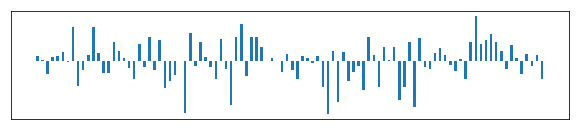

In [19]:
show_news_line(872)